<a href="https://colab.research.google.com/github/wesfdf/test/blob/main/am23Juni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-pptx
!pip install cairosvg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 149 kB 46.3 MB/s 
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470951 sha256=6e5185be7b86faa63417da63ac5f62ab9696b2e3e1d6f5887a785ddde430427b
  Stored in directory: /root/.cache/pip/wheels/a7/ab/f4/52560d0d4bd4055e9261c6df6e51c7b56c2b23cca3dee811a3
Successfully built python-pptx
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.0 MB/s 
     |████████████████████████████████| 88 kB 6.6 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=334e32b74d8088f78c18f84acbcf2e2a74266287e7e35917b271e0837ef3f119
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfull

In [2]:
from pptx import Presentation
prs  = Presentation('/content/Vorlage.pptx')
slide = prs.slides.add_slide(prs.slide_layouts[5])
#----------------------- Eleganter über templates!?
for s_ in slide.placeholders:
    print('ID = {0:d}, Shape name is \
          "{1:s}"'.format(s_.placeholder_format.idx,s_.name))

ID = 0, Shape name is           "Title 3"
ID = 1, Shape name is           "Subtitle 4"
ID = 12, Shape name is           "Text Placeholder 1"
ID = 13, Shape name is           "Text Placeholder 2"
ID = 16, Shape name is           "Text Placeholder 5"


In [3]:
import cairosvg
!curl -o logo.svg https://upload.wikimedia.org/wikipedia/commons/1/16/Bosch-logo.svg #"https://de.wikipedia.org/wiki/Robert_Bosch_GmbH#/media/Datei:Bosch-logo.svg" #https://colab.research.google.com/img/colab_favicon_256px.png
cairosvg.svg2png(
    url="https://upload.wikimedia.org/wikipedia/commons/1/16/Bosch-logo.svg", write_to="logo.png")
from google.colab import files as FILE
import os
import requests
from PIL import Image

img_data = requests.get("https://images.praxisvita.de/augenkrankheiten-sehschwaechen-simulation-beispielbild-katzenbaby,id=3acaf604,b=praxisvita,w=700,rm=sk.webp").content
with open('kat.webp', 'wb') as handler:
    handler.write(img_data)

img_data = requests.get("https://www.designtagebuch.de/wp-content/uploads/mediathek//2019/01/bosch-markenzeichen-1100x825.jpg").content
with open('Bosch.jpg', 'wb') as handler:
    handler.write(img_data)

img_data = requests.get("https://www.designtagebuch.de/wp-content/uploads/mediathek//2019/01/bosch-markenzeichen.jpg").content
with open('Bosch1.jpg', 'wb') as handler:
    handler.write(img_data)

img_data = requests.get("https://www.bosch-diy.com/images/unternehmenslogo-teaser-bosch-diy--c7d43c71b44d4e6998b6a60dd827df60.png?imgWidth=800&scale=1").content
with open('Bosch2.jpg', 'wb') as handler:
    handler.write(img_data)

image = Image.open('kat.webp')
image = image.convert('RGB')
image.save('kat.png', 'png')
    #handler.save('converting-from-webp-to-png-format.png', 'png')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3383    0  3383    0     0  39800      0 --:--:-- --:--:-- --:--:-- 40273


In [4]:
from bs4 import BeautifulSoup

URL = 'https://de.wikipedia.org/wiki/Robert_Bosch_GmbH'
website = requests.get(URL)
soup = BeautifulSoup(website.content, 'html.parser')
print(soup.shape)
print(type(soup))

None
<class 'bs4.BeautifulSoup'>


https://www.crummy.com/software/BeautifulSoup/bs4/doc/#the-string-argument


In [5]:
import re
a0 = soup.find("h1")
a = soup.find("a", text="Sitz")
a1 = soup.find("a", text="Mitarbeiterzahl")
a2 = soup.find("a", text="Umsatz")
#a3 = soup
#print(a)
#print(type(a))

b0 = a0.get_text()
b = a.find_next("a")
b1 = a1.find_next("td")
b2 = a2.find_next("td")
print(b0)

c = b.get("title")
c1 = b1.get_text()
c2 = b2.get_text()

d1 = re.findall(r'\(.*?\)', c1)
d1a = c1.split()[0]
d2 = re.findall(r'\(.*?\)', c2)
d2a = c2.split()[0]
print(d1a)
print(d2a)

e1 = d1[0].strip("()")
e2 = d2[0].strip("()")
if e1 != e2:
  print("Problem")
else:
  print("Goo!")
print(e1)

Robert Bosch GmbH
401.300
78,8
Goo!
2021


https://www.youtube.com/watch?v=3fcKKZMFbyA

In [ ]:
 #BeautifulSoup(requests.get(strIN).text, from_encoding="iso-8859-8")

In [ ]:
#BeautifulSoup(requests.get(compile(strIN)).text              , from_encoding="iso-8859-8"

In [6]:
import requests
import numpy as np
RB_ID=[692466, 101007237, 101007229, 653531, 318529, 285224, 645145]#Projekte von Bosch die interessant sind
r2 = requests.get("https://ec.europa.eu/info/funding-tenders/opportunities/api/orgProfile/data.json?pic=999908787&refreshIamUser=true")#Firma
#Get the ID From Firma-Website
r=[]
SOUP=[]
for i in RB_ID:
  strIN="https://cordis.europa.eu/api/details?contenttype=project&rcn="+str(i)+"&lang=en&paramType=id"
  SOUP=np.append(SOUP, BeautifulSoup(requests.get(strIN).text, 'html.parser'))

#print(SOUP)
r4 = requests.get("https://ec.europa.eu/info/funding-tenders/opportunities/api/orgProfile/publicProjects.json?pic=999908787&refreshIamUser=true")#PublicProjects
r3 = requests.get("https://cordis.europa.eu/api/details?contenttype=project&rcn=101007229&lang=en&paramType=id")#Projekt 1 of 7 of 158 Projects
soup2 = BeautifulSoup(r2.text, 'html.parser')
soup3 = BeautifulSoup(r3.text, 'html.parser')
soup4 = BeautifulSoup(r4.text, 'html.parser')

In [7]:
strm3="acronym\":\""

mT = []
for i in SOUP:
  i3ma = i.find(strm3)
  i3mb = i.find("\",\"startDate")
  mT = np.append(mT, i[i3ma+len(strm3):i3mb].encode('unicode-escape').replace(b'\\\\', b'\\').decode('unicode-escape'))
print(mT)

['SemI40' 'TRANSFORM' 'YESvGaN' 'FIVEVB' 'PowerSwipe' 'SuperLIB'
 'HAPPINESS']


In [8]:
strm31a="ROBERT BOSCH GMBH"
#,"nonEcContribution
strm31b="netEcContribution\":"

mT1 = []
for i in SOUP:
  i3ma1a = i.find(strm31a)
  i=i[i3ma1a:]
  i3ma1b = i.find(strm31b)
  i3mb1 = i.find(",\"nonEcContribution")
  mT1 = np.append(mT1, i[i3ma1b+len(strm31b):i3mb1].encode('unicode-escape').replace(b'\\\\', b'\\').decode('unicode-escape'))
print("netEcContribution: ", mT1)

netEcContribution:  ['450399.19' '3789023' '611629.06' 'null' 'null' 'null' '522580']


In [9]:
strm32a="ROBERT BOSCH GMBH"
#,"nonEcContribution
strm32b="nonEcContribution\":"

mT2 = []
for i in SOUP:
  i3ma2a = i.find(strm32a)
  i=i[i3ma2a:]
  i3ma2b = i.find(strm32b)
  i3mb2 = i.find(",\"formula")
  mT2 = np.append(mT2, i[i3ma2b+len(strm32b):i3mb2].encode('unicode-escape').replace(b'\\\\', b'\\').decode('unicode-escape'))
print("nonEcContribution: ", mT2)

nonEcContribution:  ['2552262.06' '15156092' '1834887.19' 'null' 'null' 'null' '0']


In [10]:
strqy3="title\":\""

qyT = []
for i in SOUP:
  i3qya = i.find(strqy3)
  i3qyb = i.find("\",\"acronym")
  qyT = np.append(qyT, i[i3qya+len(strqy3):i3qyb].encode('unicode-escape').replace(b'\\\\', b'\\').decode('unicode-escape'))
print(qyT)

['Power Semiconductor and Electronics Manufacturing 4.0'
 'Trusted European SiC Value Chain for a greener Economy'
 'Vertical GaN on Silicon: Wide Band Gap Power at Silicon Cost'
 'Five Volt Lithium Ion Batteries with Silicon Anodes produced for Next Generation Electric Vehicles'
 'POWER SoC With Integrated PassivEs'
 'Smart Battery Control System based on a Charge-equalization Circuit for an advanced Dual-Cell Battery for Electric Vehicles'
 'Haptic Printed and Patterned Interfaces for Sensitive Surface']


In [11]:
strqy3="objective\":\""

qy = []
#qyS = 0.0
for i in SOUP:
  i3qya = i.find(strqy3)
  i3qyb = i.find("\",\"topics")
  qy = np.append(qy, i[i3qya+len(strqy3):i3qyb].encode('unicode-escape').replace(b'\\\\', b'\\').decode('unicode-escape'))
  #qy = np.append(qy, i[i3qya+len(strqy3):i3qyb].replace("\\u003Cbr\\/\\u003E", "\\n ").replace("\\u201d", "\"").replace("\\u201c", "\"").replace("\\u2019", "\'").replace("\\u003E", "\'").replace("\\u2018","\'").replace("\\u0022", "'"))
  #qyS += float(i[i3qya+len(strqy3):i3qyb])

#print(qy)
#str(qy[0]).find("\\u201c")
#print(unicodedata.normalize('NFKD', qy[0]).encode('ascii', 'replace').decode())
#print(str(qy[0]).decode())
#print(json.loads(str(qy[0])))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: invalid escape sequence '\/'
  


In [12]:
str3="ecContribution\":"

w = []
wS = 0.0
for i in SOUP:
  i3a = i.find(str3)
  i3b = i.find(",\"totalCost")
  w = np.append(w, i[i3a+len(str3):i3b])
  wS += float(i[i3a+len(str3):i3b])
print(w)
ggg = round(wS/1000000.0,1)
print(round(wS/1000000.0,1))

['12227386.14' '20736450.93' '7797661.5' '5673272.5' '3295000' '4005872'
 '3774006']
57.5


In [13]:
import time
from datetime import datetime, timedelta

str3a="startDateCode\":\""
str3b="endDateCode\":\""

datesa = []
datesb = []
#dateA = []

dictt = []

wS = 0.0
for i in SOUP:
  i3aa = i.find(str3a)
  i3ab = i.find("\",\"endDate")
  datea = datetime.strptime(i[i3aa+len(str3a):i3ab], "%Y-%m-%d").strftime('%Y-%m-%d')
  dictt = np.append(dictt, datetime.strptime(i[i3aa+len(str3a):i3ab], "%Y-%m-%d").strftime('%Y'))
  i3ba = i.find(str3b)
  i3bb = i.find("\",\"website")
  dateb = datetime.strptime(i[i3ba+len(str3b):i3bb], "%Y-%m-%d").strftime('%Y-%m-%d')
  datesa = np.append(datesa, [datea])
  datesb = np.append(datesb, [dateb])
  
  print(datea, dateb)

Nulla=datesa[0]
Nullb=datesb[0]
for i in datesa:
  if (i<Nulla):
    Nulla = i
for i in datesb:
  if (i>Nullb):
    Nullb = i

print("von: ", Nulla, Nullb)

NullaE=datesa[0]
for i in datesa:
  if (i>NullaE):
    NullaE = i

gg = datetime.strptime(NullaE, "%Y-%m-%d").strftime('%Y')
print(gg)
print(str(gg))
print("Letztes: ", datetime.strptime(NullaE, "%Y-%m-%d").strftime('%Y'))


2016-05-01 2019-04-30
2021-05-01 2024-04-30
2021-05-01 2024-04-30
2015-05-01 2018-04-30
2012-10-01 2016-03-31
2011-05-01 2014-10-31
2015-01-01 2017-12-31
von:  2011-05-01 2024-04-30
2021
2021
Letztes:  2021


In [14]:
#my_dict = {i:dictt.count(i) for i in dictt}
unique, counts = np.unique(dictt, return_counts=True)
dictt2 = dict(zip(unique, counts))

In [15]:
strS4a = "title\":\""
strS4b = "\",\"acronym"
strS4aq = "ecContribution\":"
strS4bq = ",\"totalCost"
strS4aw = "totalCost\":"
strS4bw = ",\"contentCreationDate"
dataS4 = []
dataS4q = []
dataS4w = []
dataS4e = []
for i in SOUP:
  i3ca = i.find(strS4a)
  i3cb = i.find(strS4b)
  dataS4 = np.append(dataS4, i[i3ca+len(strS4a):i3cb])
  i3ca = i.find(strS4aq)
  i3cb = i.find(strS4bq)
  dataS4q = np.append(dataS4q, i[i3ca+len(strS4aq):i3cb])
  i3ca = i.find(strS4aw)
  i3cb = i.find(strS4bw)
  dataS4w = np.append(dataS4w, i[i3ca+len(strS4aw):i3cb])
  a = i.count("netEcContribution")
  print(a)
  dataS4e = np.append(dataS4e, a-1)
print(dataS4)
print(dataS4q)
print(dataS4w)
print(dataS4e)

37
36
28
10
9
10
10
['Power Semiconductor and Electronics Manufacturing 4.0'
 'Trusted European SiC Value Chain for a greener Economy'
 'Vertical GaN on Silicon: Wide Band Gap Power at Silicon Cost'
 'Five Volt Lithium Ion Batteries with Silicon Anodes produced for Next Generation Electric Vehicles'
 'POWER SoC With Integrated PassivEs'
 'Smart Battery Control System based on a Charge-equalization Circuit for an advanced Dual-Cell Battery for Electric Vehicles'
 'Haptic Printed and Patterned Interfaces for Sensitive Surface']
['12227386.14' '20736450.93' '7797661.5' '5673272.5' '3295000' '4005872'
 '3774006']
['61919643.75' '89087499.26' '26998506.26' '5927428.75' '5123890'
 '6548215' '3774006']
[36. 35. 27.  9.  8.  9.  9.]


In [16]:
PaStrA = "\",\"address"
PaStrB = "name\":\""
Parti = []
for i in SOUP:
  ii = i
  counter = 0
  while True:
    i3caa = ii.find(PaStrA)
    if i3caa == -1:
      break
    dstr00 = ii[:i3caa]
    i3cba = dstr00.rfind(PaStrB)
    #print(ii[i3cba+len(PaStrB):i3caa])
    #if counter != 0:
    blllqq = ii[i3cba+len(PaStrB):i3caa].replace("\\u0026", "&").replace("\\u0027", "\'")#'
    Parti = np.append(Parti, blllqq)
    ii = ii[i3caa+200:]
    counter += 1
  
PartiSet = list(set(Parti))
print(len(Parti))
print(len(PartiSet))
  #i3ca = i.find(PaStrA)
  #ii = i[i3ca-200:]
  #i3cb = ii.find(PaStrB)
  #print(i[i3ca:])
  #Parti = np.append(Parti, ii[i3ca-200+i3cb+len(PaStrB):i3ca])

#print(Parti)

140
114


In [17]:
from collections import Counter
numbers = Parti

counts = dict(Counter(numbers))
duplicates = {key:value for key, value in counts.items() if value > 1}

print(duplicates)
Partix = dict(sorted(duplicates.items(), key=lambda item: item[1], reverse=True))
print(Partix)
print(len(Partix))


numbers2 = Parti
counts2 = dict(Counter(numbers))
duplicates2 = {key:value for key, value in counts2.items() if value > 0}
Partix2 = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
print(Partix2)
print(len(Partix2))

{'INFINEON TECHNOLOGIES AUSTRIA  AG': 2, 'AVL LIST GMBH': 3, 'VIRTUAL VEHICLE RESEARCH GMBH': 2, 'MATERIALS CENTER LEOBEN FORSCHUNG GMBH': 2, 'INFINEON TECHNOLOGIES AG': 2, 'SEMIKRON ELEKTRONIK GMBH & CO. KG': 2, 'ROBERT BOSCH GMBH': 7, 'ION BEAM SERVICES': 2, 'FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV': 4, 'COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES': 2, 'AIXTRON SE': 2, 'EV GROUP E. THALLNER GMBH': 2, 'CONSORZIO NAZIONALE INTERUNIVERSITARIO PER LA NANOELETTRONICA': 2, 'UNIVERSITA DEGLI STUDI DI MODENA E REGGIO EMILIA': 2, 'CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS': 2, 'UNIVERSITE DE LILLE': 2, 'ARKEMA FRANCE SA': 2, 'VRIJE UNIVERSITEIT BRUSSEL': 2}
{'ROBERT BOSCH GMBH': 7, 'FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV': 4, 'AVL LIST GMBH': 3, 'INFINEON TECHNOLOGIES AUSTRIA  AG': 2, 'VIRTUAL VEHICLE RESEARCH GMBH': 2, 'MATERIALS CENTER LEOBEN FORSCHUNG GMBH': 2, 'INFINEON TECHNOLOGIES AG': 2, 'SEMIKRON ELEKTRO

In [18]:
str3c = "participants\":["

datac = []
for i in SOUP:
  i3ca = i.find(str3c)
  i3cb = i.find("],\"partners")
  datac = np.append(datac, i[i3ca+len(str3c):i3cb])

print(datac)

cou = 0
cou = 0
for i in datac:
  cou += i.count("country")

print(cou)

str3ca = "country\":{\"name\":\""

dataca = []
for i in SOUP:
  while True:
    i3caa = i.find(str3ca)
    i3cba = i.find("\",\"isoCode")
    #print("a: ", i3caa, "b: ", i3cba)
    #print(i3caa)
    if i3caa == -1:
      break
    #print(i3caa)
    #print(i[i3caa+len(str3ca):i3cba])
    dataca = np.append(dataca, i[i3caa+len(str3ca):i3cba])
    i = i[i3caa+len(str3ca)+25:]
    
    #print(i3cba)
    #print(i)
print(dataca)
print(len(set(dataca)))

str3cb = "framework\":\""

datacb = []
for i in SOUP:
  i3cab = i.find(str3cb)
  i3cbb = i.find("\",\"language")
  datacb = np.append(datacb, i[i3cab+len(str3cb):i3cbb])

print(list(set(datacb)))
print(len(set(datacb)))

['{"name":"KAI KOMPETENZZENTRUM AUTOMOBIL - UND INDUSTRIEELEKTRONIK GMBH","address":{"street":"EUROPASTRASSE 8","city":"VILLACH ST MAGDALEN","postalCode":"9524"},"country":{"name":"Austria","isoCode":"AT","euCode":"AT"},"terminated":false,"order":2,"activityType":"Private for-profit entities (excluding Higher or Secondary Education Establishments)","contribution":93559.5,"netEcContribution":93559.5,"nonEcContribution":530170.5,"formula":"participant: 623730 - 93559.5 - 0","website":"www.k-ai.at","email":"","type":"participant","contacts":[],"organizationId":"952872226","rcn":"2498702","active":true,"sme":false,"regions":"S\\u00fcd\\u00f6sterreich|K\\u00e4rnten|Klagenfurt-Villach"},{"name":"KNOW-CENTER GMBH RESEARCH CENTER FOR DATA-DRIVEN BUSINESS \\u0026 BIG DATA ANALYTICS","address":{"street":"INFFELDGASSE 13\\/6","city":"GRAZ","postalCode":"8010"},"country":{"name":"Austria","isoCode":"AT","euCode":"AT"},"terminated":false,"order":3,"activityType":"Research Organisations","contributi

In [19]:
a=soup2.get_text()
pic1=a.find("\"pic\":")
pic2=a.find("\",\"legalName")
print(pic1+7, pic2)
pic0=a[pic1+7:pic2]
print(pic0)
a1=a[a.find("Keywords"):]

Keywords=[]
for i in range(0,5):
  #n=
  a1=a1[a1.find("text")+7:]
  a3=a1.find('\"')
  #a1=
  Keywords = np.append(Keywords, a1[:a3])

print(Keywords)

50 59
999984059
['Road transport' 'Automotive engineering'
 'Electrical and electronic engineering: semiconductors, components, systems'
 'Intelligent Transport Systems (ITS)' '5g']


In [20]:
!pip install python-docx
from docx.shared import Pt
from docx.shared import RGBColor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.2 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=53215bad9f7811fb9db8be21a7c65ced1347bd19ad92c97de39fd345261d0a71
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [21]:
d2=Partix2
print(len(d2))
print(d2)
print(7 in d2.values())

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys
#d = dict()
listOfKeys = getKeysByValue(d2, 2)
print("Keys with value equal to 7: ")
#Iterate over the list of keys
for key  in listOfKeys:
        print(key)

114
{'ROBERT BOSCH GMBH': 7, 'FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV': 4, 'AVL LIST GMBH': 3, 'INFINEON TECHNOLOGIES AUSTRIA  AG': 2, 'VIRTUAL VEHICLE RESEARCH GMBH': 2, 'MATERIALS CENTER LEOBEN FORSCHUNG GMBH': 2, 'INFINEON TECHNOLOGIES AG': 2, 'SEMIKRON ELEKTRONIK GMBH & CO. KG': 2, 'ION BEAM SERVICES': 2, 'COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES': 2, 'AIXTRON SE': 2, 'EV GROUP E. THALLNER GMBH': 2, 'CONSORZIO NAZIONALE INTERUNIVERSITARIO PER LA NANOELETTRONICA': 2, 'UNIVERSITA DEGLI STUDI DI MODENA E REGGIO EMILIA': 2, 'CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS': 2, 'UNIVERSITE DE LILLE': 2, 'ARKEMA FRANCE SA': 2, 'VRIJE UNIVERSITEIT BRUSSEL': 2, 'KAI KOMPETENZZENTRUM AUTOMOBIL - UND INDUSTRIEELEKTRONIK GMBH': 1, 'KNOW-CENTER GMBH RESEARCH CENTER FOR DATA-DRIVEN BUSINESS & BIG DATA ANALYTICS': 1, 'INFINEON TECHNOLOGIES IT-SERVICES GMBH': 1, 'AT & S AUSTRIA TECHNOLOGIE & SYSTEMTECHNIK AKTIENGESELLSCHAFT': 1, 'FRAUNHOFER AUSTR

In [22]:
from pptx import Presentation
from pptx.chart.data import CategoryChartData
from pptx.enum.chart import XL_CHART_TYPE
from pptx.util import Inches

# create presentation with 1 slide ------
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[5])

# define chart data ---------------------
chart_data = CategoryChartData()
chart_data2 = CategoryChartData()
chart_data3 = CategoryChartData()
'''
#chart_data.set_size({'width': 624, 'height': 480})
chart_data.add_series({
        #'name':       'Total Vulnerabilities',
        #'data_labels': {'value': 1},
        'categories': ['2011', '2012', '2013'],
        'add_series':     ["Graph Data", 2, 1, 6],
    })
'''
chart111k=[]
chart111v=[]
chart111c=[]
for key,value in dictt2.items():
  chart111k = np.append(chart111k, str(key))
  chart111v = np.append(chart111v, value)
for i in range(0,len(chart111k)):
  chart111c = np.append(chart111c, "{'fill': {'color': '#618ECD'}},")
chartLen=len(chart111k)
chart_data.categories = chart111k#['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
chart_data.add_series('', chart111v)#(1,2,3,4,5,6,7,8,9,10,11,12))
chart_data.points = chart111c
'''[{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},
                     {'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},
                     {'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},]'''
chart_data.categories.LabelAngle = -90

chart_data2.categories = ['i', 'i', 'i', 'i']
chart_data2.add_series('', (1,2,3,4))
chart_data2.points = [{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},{'fill': {'color': '#618ECD'}},]
chart_data2.categories.LabelAngle = -90

dictt6=dict()
for o in reversed(range(0,7)):
  #counter=0
  if o in d2.values():#-ACHTUNG wird erst unten defined
    dictt6.update({o: len(getKeysByValue(d2, o))/(len(d2)-1)})#-das auch
    #print("rr: ", len(getKeysByValue(d, o)))
    #print(len(getKeysByValue(d, o))/(len(d)-1))
    print(len(getKeysByValue(d2, o))/(len(d2)-1))

print("wwww: ", dictt6)


chart116k=[]
chart116v=[]
chart116c=[]
for key,value in dictt6.items():
  chart116k = np.append(chart116k, str(key))
  chart116v = np.append(chart116v,round(value,2)*100)
  print(round(value,2))
for i in range(0,len(chart116k)):
  chart116c = np.append(chart116c, "{'fill': {'color': '#618ECD'}},")

print(chart116k,chart116v,chart116c)
chartLen=len(chart116k)
chart_data3.categories = chart116v#ACHTUNG
chart_data3.add_series('', chart116v)
chart_data3.points = chart116c
chart_data3.categories.LabelAngle = -90


#chart_data.plots[0].vary_by_categories = False

#chart_data.categories.legend.font.size = 10
# Configure the series of the chart from the dataframe data.
#chart = chart_data.add_chart({'type': 'column'})
'''
chart.add_series({
    'categories': ['Sheet1', 1, 0, 21, 0],
    'values':     ['Sheet1', 1, 1, 21, 1],
    'gap':        10,
})
'''
'''
# add chart to slide --------------------
x, y, cx, cy = Inches(2), Inches(2), Inches(6), Inches(4.5)
slide.shapes.add_chart(
    XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data
)'''

0.008849557522123894
0.008849557522123894
0.13274336283185842
0.8495575221238938
wwww:  {4: 0.008849557522123894, 3: 0.008849557522123894, 2: 0.13274336283185842, 1: 0.8495575221238938}
0.01
0.01
0.13
0.85
['4' '3' '2' '1'] [ 1.  1. 13. 85.] ["{'fill': {'color': '#618ECD'}}," "{'fill': {'color': '#618ECD'}},"
 "{'fill': {'color': '#618ECD'}}," "{'fill': {'color': '#618ECD'}},"]


'\n# add chart to slide --------------------\nx, y, cx, cy = Inches(2), Inches(2), Inches(6), Inches(4.5)\nslide.shapes.add_chart(\n    XL_CHART_TYPE.COLUMN_CLUSTERED, x, y, cx, cy, chart_data\n)'

#NLPs

Zusammenfassung:

Überprüfung von einigen keyword extractions verfahren:
https://www.analyticsvidhya.com/blog/2022/03/keyword-extraction-methods-from-documents-in-nlp/


(vll spacy)
wordcloud erstellen .generate und .generate_from_frequencies
yake von Defence empfohlen / keybert
Beautiful soup --> keywords extrahieren

mit spacy texte zusammenfassen ( hat schlecht geklappt )

In [23]:
!pip3 install wordcloud
!pip3 install matplotlib
!pip install requests
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import requests
from bs4 import BeautifulSoup

In [25]:
!pip3 install keybert
from keybert import KeyBERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.1 MB/s 
     |████████████████████████████████| 232 kB 16.3 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 4.4 MB 46.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.6 MB/s 
     |████████████████████████████████| 101 kB 11.1 MB/s 
     |████████████████████████████████| 596 kB 41.2 MB/s 
     |████████████████████████████████| 6.6 MB 30.0 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=cd986a4383d00e0a018aeea7ce1be904b7bda1947471df625a8f208fef522ee8
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.1-py3-none-any.whl size=125774 sha256=45af1603dc6f3fd70b196b6d8afb2440f99b42ed716a54048ba1b1c0ece2e7b3
 

In [26]:
import requests
import numpy as np
r2 = requests.get("https://ec.europa.eu/info/funding-tenders/opportunities/api/orgProfile/data.json?pic=999908787&refreshIamUser=true")#Firma
soup2 = BeautifulSoup(r2.text, 'html.parser')

In [27]:
a=soup2.get_text()
pic1=a.find("\"pic\":")
pic2=a.find("\",\"legalName")
print(pic1+7, pic2)
pic0=a[pic1+7:pic2]
print(pic0)
a1=a[a.find("Keywords"):]

Keywords=[]
onze=[]
keyW = ''
bool1=True
while bool1 == True:
  #n=
  a1=a1[a1.find("text")+7:]
  a3=a1.find('\"')
  keyW = keyW + a1[:a3]
  Keywords = np.append(Keywords, a1[:a3])
  onze = np.append(onze, 1)
  if (a1.find("text")==-1):
    break
  #a1=

#print(Keywords)
#onze = np.ones(len(Keywords))
#dict(zip(Keywords[:], zip(*onze[:])))
#print(onze)

import itertools
price = 1
bids = Keywords
#print(len(bids))
bibDict = dict(zip(bids, onze))#itertools.repeat(float(price),len(bids))
print(bibDict)
print(keyW)

50 59
999984059
{'Road transport': 1.0, 'Automotive engineering': 1.0, 'Electrical and electronic engineering: semiconductors, components, systems': 1.0, 'Intelligent Transport Systems (ITS)': 1.0, '5g': 1.0, 'Active safety of vehicles': 1.0, 'Automation and control systems': 1.0, 'Networks (communication networks, sensor networks, networks of robots, etc.)': 1.0, 'Quantum optics and quantum information': 1.0, 'Transport engineering': 1.0, 'Wireless communications, communication, high frequency, mobile technology': 1.0, 'Artificial intelligence, intelligent systems, multi agent systems': 1.0, 'Automation': 1.0, 'Cyber-physical systems': 1.0, 'Embedded systems': 1.0, 'Powertrain': 1.0, 'Propulsion systems engineering': 1.0, 'Sensor networks, embedded systems, hardware platforms': 1.0, 'Urban transport': 1.0, 'automated driving': 1.0, 'graphene': 1.0, 'network': 1.0, 'Communication engineering and systems telecommunications': 1.0, 'Electrical engineering, Electronic engineering, Informat

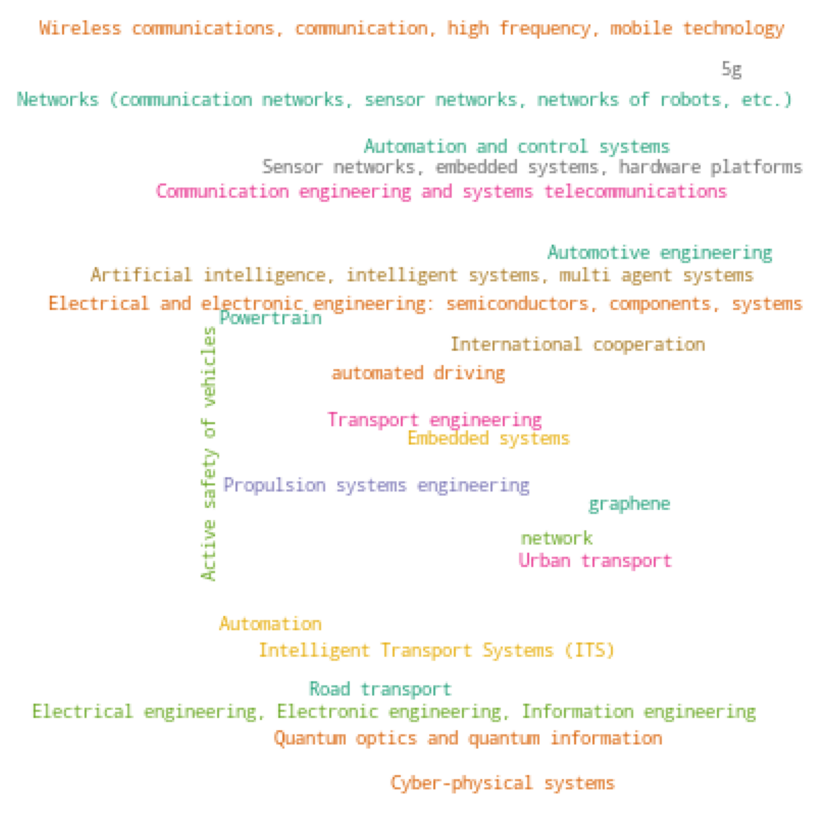

In [28]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
Operations ='''The majority of Bosch Group businesses are grouped into the following four business sectors.[19]

Mobility solutions'''
all_headlines = Operations
#all_headlines = """
#When it comes to evaluating the performance of keyword extractors, you can use some of the standard metrics in machine learning: accuracy, precision, recall, and F1 score. However, these metrics don’t reflect partial matches; they only consider the perfect match between an extracted segment and the correct prediction for that tag.
#Fortunately, there are some other metrics capable of capturing partial matches. An example of this is ROUGE.
#"""
stopwords = STOPWORDS
stopwords = ["Bosch", "Robert", "offer", "include", "sector", "Home", "product", "year", "total", "January", "Grow", "high", "point", "products", "service", "systems", "percent", "offers", "tool", "areas", "building", "start", "new", "well", "includes", "within"] + list(STOPWORDS)
wordcloud = WordCloud(colormap = 'Dark2_r', min_font_size=9, max_font_size=9, width=400, height=400, collocations = False, stopwords=stopwords, background_color="white", max_words=25).generate_from_frequencies(bibDict)#generate(keyW)#generate_from_frequencies(word_cloud_lst)#.generate(all_headlines)
#rcParams['figure.figsize'] = [10.0, 10.0]
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordC')
#plt.show()

In [33]:
d=Partix
print(len(d))
print(d)
print(7 in d.values())

18
{'ROBERT BOSCH GMBH': 7, 'FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV': 4, 'AVL LIST GMBH': 3, 'INFINEON TECHNOLOGIES AUSTRIA  AG': 2, 'VIRTUAL VEHICLE RESEARCH GMBH': 2, 'MATERIALS CENTER LEOBEN FORSCHUNG GMBH': 2, 'INFINEON TECHNOLOGIES AG': 2, 'SEMIKRON ELEKTRONIK GMBH & CO. KG': 2, 'ION BEAM SERVICES': 2, 'COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES': 2, 'AIXTRON SE': 2, 'EV GROUP E. THALLNER GMBH': 2, 'CONSORZIO NAZIONALE INTERUNIVERSITARIO PER LA NANOELETTRONICA': 2, 'UNIVERSITA DEGLI STUDI DI MODENA E REGGIO EMILIA': 2, 'CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS': 2, 'UNIVERSITE DE LILLE': 2, 'ARKEMA FRANCE SA': 2, 'VRIJE UNIVERSITEIT BRUSSEL': 2}
True


In [34]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys
#d = dict()
listOfKeys = getKeysByValue(d, 2)
print("Keys with value equal to 7: ")
#Iterate over the list of keys
for key  in listOfKeys:
        print(key)

Keys with value equal to 7: 
INFINEON TECHNOLOGIES AUSTRIA  AG
VIRTUAL VEHICLE RESEARCH GMBH
MATERIALS CENTER LEOBEN FORSCHUNG GMBH
INFINEON TECHNOLOGIES AG
SEMIKRON ELEKTRONIK GMBH & CO. KG
ION BEAM SERVICES
COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES
AIXTRON SE
EV GROUP E. THALLNER GMBH
CONSORZIO NAZIONALE INTERUNIVERSITARIO PER LA NANOELETTRONICA
UNIVERSITA DEGLI STUDI DI MODENA E REGGIO EMILIA
CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS
UNIVERSITE DE LILLE
ARKEMA FRANCE SA
VRIJE UNIVERSITEIT BRUSSEL


In [61]:
print(RB_ID)

[692466, 101007237, 101007229, 653531, 318529, 285224, 645145]


In [62]:
from posixpath import join
import pptx.util
from PIL import Image

#mind. eines von folgenden Modulen wird benötigt
from pptx import Presentation
from pptx.chart.data import ChartData
from pptx.enum.chart import XL_CHART_TYPE, XL_LABEL_POSITION
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.util import Cm
from pptx.dml.color import RGBColor

REPLACEMENT_IMG="Herunterladen.jpg"

prs  = Presentation('/content/Vorlage.pptx')
counter = 0
'''
x=shape.left
y=shape.top
width=shape.width
height=shape.height
'''
Liste=np.empty((0,4),int)

slide = prs.slides[2]
pic = slide.shapes.add_picture("/content/kat.png", 2000000, 1000000, 8000000, 4000000)

for shape in prs.slides[3].shapes:
  if not shape.has_text_frame:
    slide = prs.slides[3]
    t=[[shape.left,shape.top,shape.width,shape.height]]
    Liste = np.append(Liste,t,axis=0)
    pic = shape._element
    pic.getparent().remove(pic)
    print(type(shape))
    #if counter==2:
    #  shape.add_chart().chart#replace_data()

    #print(shape.text)
    counter+=1
    continue

  #print(type(shape))
  #print(shape.text)


  if "Vaillant GmbH" in shape.text:
    shape.text_frame.paragraphs[0].runs[0].text = b0

  if "Unternehmenseckzahlen" in shape.text:
    print(len(shape.text_frame.paragraphs))
    shape.text_frame.paragraphs[0].runs[0].text = shape.text_frame.paragraphs[0].runs[0].text.replace("2020", e1)
    shape.text_frame.paragraphs[1].runs[0].text = shape.text_frame.paragraphs[1].runs[0].text.replace("Remscheid", c)
    shape.text_frame.paragraphs[2].runs[0].text = shape.text_frame.paragraphs[2].runs[0].text.replace("2,7", d2a)
    shape.text_frame.paragraphs[3].runs[0].text = shape.text_frame.paragraphs[3].runs[0].text.replace("15.000", d1a)
    #shape.text_frame.paragraphs[4].runs[0].text = shape.text_frame.paragraphs[4].runs[0].text
    for i in range(6,len(shape.text_frame.paragraphs)):
      for j in range(0,len(shape.text_frame.paragraphs[i].runs)):
        #print("i: ", i, " j: ", j)
        #print(shape.text_frame.paragraphs[i].runs[j].text)
        shape.text_frame.paragraphs[i].runs[j].text = ""


  if "7 EU Projekte" in shape.text:
    text001="7 von 158" + " EU Projekte im Zeitraum von " + str(Nulla) + " - " + str(Nullb) + " mit einem "
    text002="EU-Zuschuss"
    text003=" von insgesamt "
    text004=str(ggg) + " Mio € ("
    text005=str(list(set(datacb))) + "); Letztes Projekt " + str(gg) + "; Keine Projektkoordination; " + str(cou) \
    + " verschiedene Konsortialpartner in " + str(len(set(dataca))) + " Ländern."


    shape.text = "foobar"
    text_frame = shape.text_frame
    text_frame.clear()
    p = text_frame.paragraphs[0]

    p.add_run().text = text001
    p.runs[0].font.bold = False
    p.add_run().text = text002
    p.runs[1].font.bold = True
    p.add_run().text = text003
    p.runs[2].font.bold = False
    p.add_run().text = text004
    p.runs[3].font.bold = True
    p.add_run().text = text005
    p.runs[4].font.bold = False

    print("jj: ", shape.text)

    #print(shape.text_frame.paragraphs[0].runs[0].text)
    #print(len(shape.text_frame.paragraphs[0].runs), "LLLL")
    '''
    shape.text = shape.text.replace("7 EU Projekte", "7 von 158 EU Projekte")
    shape.text = shape.text.replace("Zeitraum von 1.4.2012 - 30.9.2023", "Zeitraum von " + str(Nulla) + str(Nullb))
    shape.text = shape.text.replace("insgesamt 3,5", "insgesamt " + str(ggg))
    shape.text = shape.text.replace("(FP7 und H2020)", "("+str(list(set(datacb)))+")")
    shape.text = shape.text.replace("Letztes Projekt 2019", "Letztes Projekt " + str(gg))
    shape.text = shape.text.replace("154 v", str(cou) + " v")
    shape.text = shape.text.replace("16 L", str(len(set(dataca))) + " L")
    '''
    for paragraph in shape.text_frame.paragraphs:
      paragraph.font.name = 'Thaoma'
      paragraph.font.size = Pt(14)
      paragraph.font.bold = True

  if "Ersten 5 EU-Kennwörter: " in shape.text:

    #for i in range(0,5):
      #KeyString="K"+str(i+1)
      #print("33333: ", shape.text_frame.paragraphs[2].runs[3].text)
      #print(KeyString)
      #print(shape.text_frame.paragraphs[2].runs[4+i*2].text.replace(KeyString, Keywords[i]))
      shape.text_frame.paragraphs[2].runs[3].text = "1) "+Keywords[0]+" 2) "+Keywords[1]+" 3) "+Keywords[2]+" 4) "+Keywords[3]+" 5) "+Keywords[4]
      #print(Keywords[i])
      #print(shape.text_frame.paragraphs[2].runs[4+i*2].text)
    
  if "Unternehmenskennzahl):  " in shape.text:
    shape.text = shape.text.replace(str(986263312), pic0)
    for paragraph in shape.text_frame.paragraphs:
      paragraph.font.name = 'Thaoma'
      paragraph.font.size = Pt(12)
      paragraph.font.bold = False

    '''
    for i in range(0,len(shape.text_frame.paragraphs)):
      for j in range(0,len(shape.text_frame.paragraphs[i].runs)):
        print("i: ", i, " j: ", j)
        print(shape.text_frame.paragraphs[i].runs[j].text)
    '''

#shape = slide.shapes.add_chart(style, type, Liste[1][0], Liste[1][1], Liste[1][2], Liste[1][3])

#pic = slide.shapes.add_picture("Herunterladen.jpg", x, y, width, height)
pic = slide.shapes.add_picture("/content/logo.png", Liste[1][0], Liste[1][1], Liste[1][2], Liste[1][3])



chart = slide.shapes.add_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, Liste[3][0], Liste[3][1], Liste[3][2], Liste[3][3], chart_data)
chart2 = slide.shapes.add_chart(XL_CHART_TYPE.BAR_CLUSTERED, Liste[2][0], Liste[2][1], Liste[2][2], Liste[2][3], chart_data2)

chart.chart.category_axis.tick_labels.font.size = Pt(8)#100000
chart.chart.category_axis.tick_labels.font.name = 'Thaoma'
chart.chart.has_title = False
chart.chart.series[0].format.fill.solid()
chart.chart.series[0].format.fill.fore_color.rgb = RGBColor(0,60,100)
#chart.chart.vary_by_categories = False

chart2.chart.category_axis.tick_labels.font.size = Pt(8)#100000
chart2.chart.category_axis.tick_labels.font.name = 'Thaoma'
chart2.chart.has_title = False
chart2.chart.series[0].format.fill.solid()
chart2.chart.series[0].format.fill.fore_color.rgb = RGBColor(0,60,100)

#Seite 4:
counter = 0
counter2 = 0
counter3 = 0
Liste1=np.empty((0,4),int)
for shape in prs.slides[4].shapes:
  if shape.has_text_frame:
    #print(counter2, shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0
    if counter2 >= 5 and counter2 <= 11:
      shape.text = "foobar"
      text_frame = shape.text_frame
      text_frame.clear()
      p = text_frame.paragraphs[0]
      
      p.add_run().text = dataS4[counter2-5] + "\n"
      p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
      p.runs[0].font.name = 'Thaoma'
      p.runs[0].font.bold = True
      p.runs[0].font.size = Pt(12)
      p.runs[0].address = 'https://cordis.europa.eu/project/id/' + str(RB_ID[counter3])
      counter3 += 1
      p.add_run().text = "Gesamtvolumen  " + str(round(float(dataS4w[counter2-5])/1000000.0,1)) + " Mio € | EU-Förderquote " +\
      str(round(100*float(dataS4q[counter2-5])/float(dataS4w[counter2-5]),1)) + "% | " + str(round(dataS4e[counter2-5])) + " Konsortialpartner"
      #print("Gesamtvolumen  " + str(round(float(dataS4w[counter2-5])/1000000.0,1)) + " Mio € | EU-Förderquote " +\
      #str(round(100*float(dataS4q[counter2-5])/float(dataS4w[counter2-5]),1)) + "% | " + str(round(dataS4e[counter2-5])) + " Konsortialpartner")
      p.runs[1].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
      p.runs[1].font.bold = False
      p.runs[1].font.size = Pt(12)
      #print(shape.text)
    counter2 += 1
    if "Tags" in shape.text:
      #print("wwqq")
      shape.text_frame.paragraphs[0].runs[0].text = str(bids)#str(bibDict[0])

    '''
        z = shape.text_frame.paragraphs[0].runs[0]
        z.text = 'link to data @ cordis'
        hlink = z.hyperlink
        hlink.address = 'https://cordis.europa.eu/project/id/' + str(RB_ID[p]) 
    '''
  #Namen in dataS4 gespeichert
  #print(shape)
  if not shape.has_text_frame:
    #if counter == 1:
    #print("qqq", shape)
    slide = prs.slides[4]
    t=[[shape.left,shape.top,shape.width,shape.height]]
    #print(t)
    Liste1 = np.append(Liste1,t,axis=0)
    pic = shape._element
    pic.getparent().remove(pic)

    counter+=1
    continue

#print("hhh: ", Liste1)
pic = slide.shapes.add_picture("/content/wordC.png", Liste1[1][0], Liste1[1][1], Liste1[1][2], Liste1[1][3]) #wordC.png

#Seite5
'''
counter5=0
slide = prs.slides[5]
for shape in prs.slides[5].shapes:
  if shape.shape_type == MSO_SHAPE_TYPE.GROUP:
    for s in shape:
      print(s.text)



group_shapes = [
  shape for shape in slide.shapes
  if shape.shape_type == MSO_SHAPE_TYPE.GROUP
]
print(len(group_shapes))

for group_shape in group_shapes:
  for shape in group_shape.shapes:
    if shape.has_text_frame:
      print(shape.text)

'''

#print(group_shapes)
#print(group_shapes.text)
'''
  for group_shape in group_shapes:
        for shape in group_shape.shapes:
            if shape.has_text_frame:
                print(shape.text)
'''
#counteer=0
bool1=True
for shape in prs.slides[5].shapes:
  #counter5+=1
  #print("TEST: ", counter5, shape)
  if shape.has_text_frame:
    #print("TEEEST: ", counter5, shape.text)
    print("RRR: ", shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0

    '''
    if "COMTES" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[0])+str(qyT[0])
    if "ene.field" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[1])+str(qyT[1])
    if "iNSPiRe" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[2])+str(qyT[2])
    if "CREATE" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[3])+str(qyT[3])
    if "HEATSTACK" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[4])+str(qyT[4])
    if "PACE" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[5])+str(qyT[5])
    if "InterConnect" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[6])+str(qyT[6])
    '''

    if bool1==True and 1==0:
      h = shape.text_frame.add_paragraph()
      h.text = "AKRO: " + str(mT)
      h = shape.text_frame.add_paragraph()
      h.text = "nonEcContribution: " + str(mT1)
      h = shape.text_frame.add_paragraph()
      h.text = "nonEcContribution: " + str(mT2)
      h = shape.text_frame.add_paragraph()
      h.text = "VON: " + str(datesa)
      h = shape.text_frame.add_paragraph()
      h.text = "BIS: " + str(datesb)
      hh = shape.text_frame.add_paragraph()
      hh.text = "ZSM: " + str(qyT)
      bool1=False
      print(qyT)

    if "Informationen" in shape.text:
      #shape.text_frame.paragraphs[0].runs[0].text = "TEST"
      h = shape.text_frame.add_paragraph()
      h.text = "AKRO: " + str(mT)
      h = shape.text_frame.add_paragraph()
      h.text = "nonEcContribution: " + str(mT1)
      h = shape.text_frame.add_paragraph()
      h.text = "nonEcContribution: " + str(mT2)
      h = shape.text_frame.add_paragraph()
      h.text = "VON: " + str(datesa)
      h = shape.text_frame.add_paragraph()
      h.text = "BIS: " + str(datesb)
      hh = shape.text_frame.add_paragraph()
      hh.text = "ZSM: " + str(qyT)


#Seite6
counter = 0
counter2 = 0
Liste6=np.empty((0,4),int)
dict6 = dict()
for shape in prs.slides[6].shapes:
  if not shape.has_text_frame and counter2 <2:
    slide = prs.slides[6]
    t=[[shape.left,shape.top,shape.width,shape.height]]
    Liste6 = np.append(Liste6,t,axis=0)
    pic = shape._element
    pic.getparent().remove(pic)
    print("REMOVE")
    print(type(shape))
    counter2+=1
    continue
  if shape.has_text_frame:
    #print(shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0
    if "Partner in einem" in shape.text or "Partner in zwei" in shape.text or "Partner in drei" in shape.text:
      shape.text = "foobar"
      text_frame = shape.text_frame
      text_frame.clear()
      #p = text_frame.paragraphs[0]
    if "Zusammenarbeit in 3" in shape.text:
      shape.text = "foobar"
      text_frame = shape.text_frame
      text_frame.clear()

      for o in reversed(range(1,7)):
        #print(o)
        if o in d.values():
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter]#2*counter
          p.level = 0
          p.add_run().text = "Zusammenarbeit in " + str(o) + " von 7 Projekten" + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(14)
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter+1]
          p.level = 1
          p.add_run().text = str(getKeysByValue(d, o)) + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(12)
          dict6.update({str(o): str(getKeysByValue(d, o))})
          #Liste6b = np.append(Liste6b,t,axis=0)
          counter += 1
        if o==1:
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter]
          p.level = 0
          p.add_run().text = "Mit den übrigen " + str(len(PartiSet) - len(Partix)) + " der insgesamt "+ str(len(PartiSet)) +" Projektpartnern wurde jeweils nur in einem Projekt zusammengearbeitet."
          #"Zusammenarbeit in " + str(o) + " von 7 Projekten" + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(14)


#print("aa")

print(Liste6, Liste6.shape)
chart3 = prs.slides[6].shapes.add_chart(XL_CHART_TYPE.PIE_EXPLODED, Liste6[1][0], Liste6[1][1], Liste6[1][2]+100, Liste6[1][3]+100, chart_data3)
#chart3.chart.category_axis.tick_labels.font.size = Pt(8)#100000
#chart3.chart.category_axis.tick_labels.font.name = 'Thaoma'
chart3.chart.has_title = False
chart3.chart.series[0].format.fill.solid()
chart3.chart.series[0].format.fill.fore_color.rgb = RGBColor(0,60,100)
#chart.chart.vary_by_categories = False
chart3.chart.series[0].data_labels.show_category_name = True
chart3.chart.series[0].data_labels.position = XL_LABEL_POSITION.BEST_FIT#OUTSIDE_END
chart3.chart.series[0].data_labels.font.color.rgb = RGBColor(80,95,100)
#Partix

#2.Teil:
name1="H2020"
name2="COMTES"
name3="abgeschlossen"
for p in range(0,8):
  for shape in prs.slides[9+p*2].shapes:
    if shape.has_text_frame:
      #print(shape.text)
      if "Vaillant GmbH" in shape.text:#Vaillant GmbH: H2020-Projekt COMTES (abgeschlossen)
        shape.text_frame.paragraphs[0].runs[0].text = b0 + qyT[p]#": "+name1+"-Projekt "+name2+" ("+name3+")"
      if "The COMTES project" in shape.text:
        shape.text_frame.paragraphs[0].runs[0].text = qy[p]
      if "gghh" in shape.text:
        z = shape.text_frame.paragraphs[0].runs[0]
        z.text = 'link to data @ cordis'
        hlink = z.hyperlink
        hlink.address = 'https://cordis.europa.eu/project/id/' + str(RB_ID[p]) 
        #r = shape.text_frame.paragraphs[0].add_run()#.runs[0]
        #r.text = 
        #r.hyperlink.adress = 'https://cordis.europa.eu/project/id/' + str(RB_ID[p])

'''
r = p.add_run()
r.text = 'https://cordis.europa.eu/project/id/' + BllA
hlink = r.hyperlink
hlink.address = 'https://github.com/scanny/python-pptx'
'''

#chart.set_x_axis({'name': 'Index', 'num_font':  {'rotation': 45}})
#{'type': 'column'}
print("Position not shape.has_text_frame", Liste)
prs.save("testp.pptx") # save changes

<class 'pptx.shapes.graphfrm.GraphicFrame'>
<class 'pptx.shapes.picture.Picture'>
12
jj:  7 von 158 EU Projekte im Zeitraum von 2011-05-01 - 2024-04-30 mit einem EU-Zuschuss von insgesamt 57.5 Mio € (['H2020', 'FP7']); Letztes Projekt 2021; Keine Projektkoordination; 133 verschiedene Konsortialpartner in 14 Ländern.
<class 'pptx.shapes.graphfrm.GraphicFrame'>
<class 'pptx.shapes.graphfrm.GraphicFrame'>
RRR:  Vaillant GmbH
RRR:  EU-Projekte im zeitlichen Verlauf
RRR:  6
RRR:  2012
RRR:  2013
RRR:  2014
RRR:  2015
RRR:  2016
RRR:  2017
RRR:  2018
RRR:  2019
RRR:  2020
RRR:  2021
RRR:  2022
RRR:  2023
RRR:  
RRR:  126 T€
RRR:  2,9
Mio €
RRR:  Funding Profile - Vaillant
RRR:  
RRR:  Projektlaufzeit
RRR:  EU-Zuschuss für das betrachtete Unternehmen
RRR:  < 100 T€
RRR:  100 T€ - 1 Mio €
RRR:  > 1 Mio €
RRR:  Legende
RRR:  Vertraulich C1
RRR:  Informationen
REMOVE
<class 'pptx.shapes.graphfrm.GraphicFrame'>
REMOVE
<class 'pptx.shapes.graphfrm.GraphicFrame'>
[[   1588    1588    1588    1588]


PPTX

https://towardsdatascience.com/standing-out-from-the-cloud-how-to-shape-and-format-a-word-cloud-bf54beab3389

Interessante mask!!!!!!!!!HIER!!!!!!

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
emoji_text=text

NameError: ignored

In [ ]:
# Default WordCloud
wordcloud = WordCloud().generate(emoji_text)  
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

NameError: ignored

In [ ]:
wordcloud = WordCloud(max_font_size=80, max_words=1000, background_color='black', colormap='Paired').generate(emoji_text)

In [ ]:
stopwords = set(STOPWORDS)
font_path = "content"

In [ ]:
mask2 = np.array(Image.open("Bosch.jpg"))
emo2 = WordCloud(background_color="white", max_words=100, mask=mask2, stopwords=stopwords,
               min_font_size=10, colormap='Dark2')
# Generate a wordcloud
emo2.generate(emoji_text)


In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

mask = np.array(Image.open('BoschI.jpg'))
# Get the color map by name:
cm = plt.get_cmap('gist_rainbow')#, lut=8)
#cm = plt.get_cmap('gist_rainbow')

# Apply the colormap like a function to any array:
colored_image = cm(mask)

colored_image.shape

#Wie speichert man das?? (Neue Farben für ein Bild)


In [ ]:
from skimage import data, color, io, img_as_float
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.6

img = img_as_float(data.camera())
rows, cols = img.shape

# Construct a colour image to superimpose
color_mask = np.zeros((rows, cols, 3))
color_mask[30:140, 30:140] = [1, 0, 0]  # Red block
color_mask[170:270, 40:120] = [0, 1, 0] # Green block
color_mask[200:350, 200:350] = [0, 0, 1] # Blue block

# Construct RGB version of grey-level image
img_color = np.dstack((img, img, img))

# Convert the input image and color mask to Hue Saturation Value (HSV)
# colorspace
img_hsv = color.rgb2hsv(img_color)
color_mask_hsv = color.rgb2hsv(mask)#color_mask)

# Replace the hue and saturation of the original image
# with that of the color mask
img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

img_masked = color.hsv2rgb(img_hsv)

# Display the output
f, (ax0, ax1, ax2) = plt.subplots(1, 3,
                                  subplot_kw={'xticks': [], 'yticks': []})
ax0.imshow(img, cmap=plt.cm.gray)
ax1.imshow(mask)#color_mask)
ax2.imshow(img_masked)
plt.show()

In [ ]:
import cv2

# note — need to set max font size, or font extends over the colors
mask = np.array(Image.open('BoschI.jpg').crop((0, 0, 512, 512)))#)#.crop((250, 130, 850, 700)))
#mask = cv2.cvtColor(mask,cv2.COLOR_GRAY2RGB)
emo_clr = WordCloud(background_color='white', mode='RGBA', max_words=1000, relative_scaling=0.3, max_font_size=20, min_font_size=10, mask=mask).generate(emoji_text)
#, min_font_size=18, max_font_size=28,

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
#Problem with gray scale image
plt.imshow(emo_clr.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()
plt.imshow(mask, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#https://www.geeksforgeeks.org/python-pillow-colors-on-an-image/
from PIL import Image
 
 
img = Image.open("Bosch.jpg")
img = img.convert("RGB")
 
d = img.getdata()
 
new_image = []
for item in d:
   
    # change all white (also shades of whites)
    # pixels to yellow
    if item[0] in list(range(200, 256)):
        new_image.append((255, 100, 100))
    elif item[0] in list(range(0, 256)):
        new_image.append((100, 255, 100))
    else:
        new_image.append(item)
         
# update image data
img.putdata(new_image)#_data)
#print(new_image.shape)
# save new image
img.save("BoschI.jpg")

HIER

In [ ]:
from PIL import Image
import PIL.ImageOps    

image = Image.open('Bosch.jpg')
#test = Image.open('bbS.jpg')

inverted_image = PIL.ImageOps.invert(image)

inverted_image.save('BoschI.jpg')

In [ ]:
#wäre gut in invert funktion
def closest_color(rgb):
    r, g, b = rgb
    color_diffs = []
    for color in COLORS:
        cr, cg, cb = color
        color_diff = sqrt((r - cr)**2 + (g - cg)**2 + (b - cb)**2)
        color_diffs.append((color_diff, color))
    return min(color_diffs)[1]

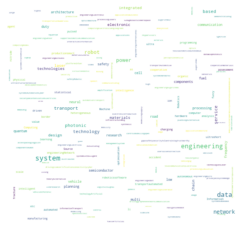

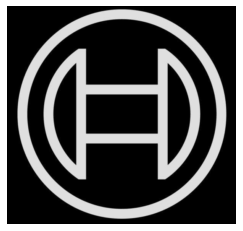

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = keyW 
#'''Ich hab nun schon ein paar Python Progrämmchen geschrieben und stosse immer wieder auf das gleiche Problem, finde aber keine elegante Lösung dazu. Ich versuche, mich beim Coden möglichst an den Style Guide (PEP 8 - http://www.python.org/dev/peps/pep-0008/) zu halten. Dieser empfiehlt, die maximale Länge einer Zeile auf 79 Zeichen zu beschränken. Mein Problem ist nun das folgende: wie definiere ich am besten einen langen String? Beispiel:
#CODE: ALLES AUSWÄHLEN'''

#text = open(path.join(d, 'alice.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
alice_mask = np.array(Image.open(path.join(d, "/content/BoschI.jpg")).crop((250, 130, 850, 700)))#alice_mask.png
#alice_mask = np.array(Image.open(path.join(d, "/content/Bosch2.jpg")).crop((10, 10, 800, 800)))
#croppedIm = Image1.crop((130, 120, 200, 200)) 
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", mode="RGBA", max_words=200, max_font_size=18, mask=alice_mask,
               stopwords=stopwords, contour_width=0, contour_color='steelblue')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "alice1.png"))

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

#Wäre cool wenn wordcloud2 funktioniert....

In [ ]:
#Color mask wordcloud: https://www.datacamp.com/tutorial/wordcloud-python
'''
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=200, mask=alice_mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("imggg.png", format="png")
#plt.show()
'''

'\nfrom wordcloud import WordCloud, STOPWORDS, ImageColorGenerator\nwordcloud_por = WordCloud(stopwords=stopwords, background_color="white", max_words=200, mask=alice_mask).generate(text)\n\n# create coloring from image\nimage_colors = ImageColorGenerator(alice_mask)\nplt.figure(figsize=[7,7])\nplt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")\nplt.axis("off")\n\n# store to file\nplt.savefig("imggg.png", format="png")\n#plt.show()\n'

18
{'ROBERT BOSCH GMBH': 7, 'FRAUNHOFER GESELLSCHAFT ZUR FORDERUNG DER ANGEWANDTEN FORSCHUNG EV': 4, 'AVL LIST GMBH': 3, 'INFINEON TECHNOLOGIES AUSTRIA  AG': 2, 'VIRTUAL VEHICLE RESEARCH GMBH': 2, 'MATERIALS CENTER LEOBEN FORSCHUNG GMBH': 2, 'INFINEON TECHNOLOGIES AG': 2, 'SEMIKRON ELEKTRONIK GMBH & CO. KG': 2, 'ION BEAM SERVICES': 2, 'COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES': 2, 'AIXTRON SE': 2, 'EV GROUP E. THALLNER GMBH': 2, 'CONSORZIO NAZIONALE INTERUNIVERSITARIO PER LA NANOELETTRONICA': 2, 'UNIVERSITA DEGLI STUDI DI MODENA E REGGIO EMILIA': 2, 'CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS': 2, 'UNIVERSITE DE LILLE': 2, 'ARKEMA FRANCE SA': 2, 'VRIJE UNIVERSITEIT BRUSSEL': 2}
True


In [31]:

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys
#d = dict()
listOfKeys = getKeysByValue(d, 2)
print("Keys with value equal to 7: ")
#Iterate over the list of keys
for key  in listOfKeys:
        print(key)

Keys with value equal to 7: 
INFINEON TECHNOLOGIES AUSTRIA  AG
VIRTUAL VEHICLE RESEARCH GMBH
MATERIALS CENTER LEOBEN FORSCHUNG GMBH
INFINEON TECHNOLOGIES AG
SEMIKRON ELEKTRONIK GMBH & CO. KG
ION BEAM SERVICES
COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES
AIXTRON SE
EV GROUP E. THALLNER GMBH
CONSORZIO NAZIONALE INTERUNIVERSITARIO PER LA NANOELETTRONICA
UNIVERSITA DEGLI STUDI DI MODENA E REGGIO EMILIA
CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS
UNIVERSITE DE LILLE
ARKEMA FRANCE SA
VRIJE UNIVERSITEIT BRUSSEL


In [32]:
from posixpath import join
import pptx.util
from PIL import Image

#mind. eines von folgenden Modulen wird benötigt
from pptx import Presentation
from pptx.chart.data import ChartData
from pptx.enum.chart import XL_CHART_TYPE, XL_LABEL_POSITION
from pptx.enum.shapes import MSO_SHAPE_TYPE
from pptx.util import Cm
from pptx.dml.color import RGBColor

REPLACEMENT_IMG="Herunterladen.jpg"

prs  = Presentation('/content/Vorlage.pptx')
counter = 0
'''
x=shape.left
y=shape.top
width=shape.width
height=shape.height
'''
Liste=np.empty((0,4),int)

slide = prs.slides[2]
pic = slide.shapes.add_picture("/content/kat.png", 2000000, 1000000, 8000000, 4000000)

for shape in prs.slides[3].shapes:
  if not shape.has_text_frame:
    slide = prs.slides[3]
    t=[[shape.left,shape.top,shape.width,shape.height]]
    Liste = np.append(Liste,t,axis=0)
    pic = shape._element
    pic.getparent().remove(pic)
    print(type(shape))
    #if counter==2:
    #  shape.add_chart().chart#replace_data()

    #print(shape.text)
    counter+=1
    continue

  #print(type(shape))
  #print(shape.text)


  if "Vaillant GmbH" in shape.text:
    shape.text_frame.paragraphs[0].runs[0].text = b0

  if "Unternehmenseckzahlen" in shape.text:
    print(len(shape.text_frame.paragraphs))
    shape.text_frame.paragraphs[0].runs[0].text = shape.text_frame.paragraphs[0].runs[0].text.replace("2020", e1)
    shape.text_frame.paragraphs[1].runs[0].text = shape.text_frame.paragraphs[1].runs[0].text.replace("Remscheid", c)
    shape.text_frame.paragraphs[2].runs[0].text = shape.text_frame.paragraphs[2].runs[0].text.replace("2,7", d2a)
    shape.text_frame.paragraphs[3].runs[0].text = shape.text_frame.paragraphs[3].runs[0].text.replace("15.000", d1a)
    #shape.text_frame.paragraphs[4].runs[0].text = shape.text_frame.paragraphs[4].runs[0].text
    for i in range(6,len(shape.text_frame.paragraphs)):
      for j in range(0,len(shape.text_frame.paragraphs[i].runs)):
        #print("i: ", i, " j: ", j)
        #print(shape.text_frame.paragraphs[i].runs[j].text)
        shape.text_frame.paragraphs[i].runs[j].text = ""


  if "7 EU Projekte" in shape.text:
    text001="7 von 158" + " EU Projekte im Zeitraum von " + str(Nulla) + " - " + str(Nullb) + " mit einem "
    text002="EU-Zuschuss"
    text003=" von insgesamt "
    text004=str(ggg) + " Mio € ("
    text005=str(list(set(datacb))) + "); Letztes Projekt " + str(gg) + "; Keine Projektkoordination; " + str(cou) \
    + " verschiedene Konsortialpartner in " + str(len(set(dataca))) + " Ländern."


    shape.text = "foobar"
    text_frame = shape.text_frame
    text_frame.clear()
    p = text_frame.paragraphs[0]

    p.add_run().text = text001
    p.runs[0].font.bold = False
    p.add_run().text = text002
    p.runs[1].font.bold = True
    p.add_run().text = text003
    p.runs[2].font.bold = False
    p.add_run().text = text004
    p.runs[3].font.bold = True
    p.add_run().text = text005
    p.runs[4].font.bold = False

    print("jj: ", shape.text)

    #print(shape.text_frame.paragraphs[0].runs[0].text)
    #print(len(shape.text_frame.paragraphs[0].runs), "LLLL")
    '''
    shape.text = shape.text.replace("7 EU Projekte", "7 von 158 EU Projekte")
    shape.text = shape.text.replace("Zeitraum von 1.4.2012 - 30.9.2023", "Zeitraum von " + str(Nulla) + str(Nullb))
    shape.text = shape.text.replace("insgesamt 3,5", "insgesamt " + str(ggg))
    shape.text = shape.text.replace("(FP7 und H2020)", "("+str(list(set(datacb)))+")")
    shape.text = shape.text.replace("Letztes Projekt 2019", "Letztes Projekt " + str(gg))
    shape.text = shape.text.replace("154 v", str(cou) + " v")
    shape.text = shape.text.replace("16 L", str(len(set(dataca))) + " L")
    '''
    for paragraph in shape.text_frame.paragraphs:
      paragraph.font.name = 'Thaoma'
      paragraph.font.size = Pt(14)
      paragraph.font.bold = True

  if "Ersten 5 EU-Kennwörter: " in shape.text:

    #for i in range(0,5):
      #KeyString="K"+str(i+1)
      #print("33333: ", shape.text_frame.paragraphs[2].runs[3].text)
      #print(KeyString)
      #print(shape.text_frame.paragraphs[2].runs[4+i*2].text.replace(KeyString, Keywords[i]))
      shape.text_frame.paragraphs[2].runs[3].text = "1) "+Keywords[0]+" 2) "+Keywords[1]+" 3) "+Keywords[2]+" 4) "+Keywords[3]+" 5) "+Keywords[4]
      #print(Keywords[i])
      #print(shape.text_frame.paragraphs[2].runs[4+i*2].text)
    
  if "Unternehmenskennzahl):  " in shape.text:
    shape.text = shape.text.replace(str(986263312), pic0)
    for paragraph in shape.text_frame.paragraphs:
      paragraph.font.name = 'Thaoma'
      paragraph.font.size = Pt(12)
      paragraph.font.bold = False

    '''
    for i in range(0,len(shape.text_frame.paragraphs)):
      for j in range(0,len(shape.text_frame.paragraphs[i].runs)):
        print("i: ", i, " j: ", j)
        print(shape.text_frame.paragraphs[i].runs[j].text)
    '''

#shape = slide.shapes.add_chart(style, type, Liste[1][0], Liste[1][1], Liste[1][2], Liste[1][3])

#pic = slide.shapes.add_picture("Herunterladen.jpg", x, y, width, height)
pic = slide.shapes.add_picture("/content/logo.png", Liste[1][0], Liste[1][1], Liste[1][2], Liste[1][3])



chart = slide.shapes.add_chart(XL_CHART_TYPE.COLUMN_CLUSTERED, Liste[3][0], Liste[3][1], Liste[3][2], Liste[3][3], chart_data)
chart2 = slide.shapes.add_chart(XL_CHART_TYPE.BAR_CLUSTERED, Liste[2][0], Liste[2][1], Liste[2][2], Liste[2][3], chart_data2)

chart.chart.category_axis.tick_labels.font.size = Pt(8)#100000
chart.chart.category_axis.tick_labels.font.name = 'Thaoma'
chart.chart.has_title = False
chart.chart.series[0].format.fill.solid()
chart.chart.series[0].format.fill.fore_color.rgb = RGBColor(0,60,100)
#chart.chart.vary_by_categories = False

chart2.chart.category_axis.tick_labels.font.size = Pt(8)#100000
chart2.chart.category_axis.tick_labels.font.name = 'Thaoma'
chart2.chart.has_title = False
chart2.chart.series[0].format.fill.solid()
chart2.chart.series[0].format.fill.fore_color.rgb = RGBColor(0,60,100)

#Seite 4:
counter = 0
counter2 = 0
Liste1=np.empty((0,4),int)
for shape in prs.slides[4].shapes:
  if shape.has_text_frame:
    #print(counter2, shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0
    if counter2 >= 5 and counter2 <= 11:
      shape.text = "foobar"
      text_frame = shape.text_frame
      text_frame.clear()
      p = text_frame.paragraphs[0]
      
      p.add_run().text = dataS4[counter2-5] + "\n"
      p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
      p.runs[0].font.name = 'Thaoma'
      p.runs[0].font.bold = True
      p.runs[0].font.size = Pt(12)
      p.add_run().text = "Gesamtvolumen  " + str(round(float(dataS4w[counter2-5])/1000000.0,1)) + " Mio € | EU-Förderquote " +\
      str(round(100*float(dataS4q[counter2-5])/float(dataS4w[counter2-5]),1)) + "% | " + str(round(dataS4e[counter2-5])) + " Konsortialpartner"
      #print("Gesamtvolumen  " + str(round(float(dataS4w[counter2-5])/1000000.0,1)) + " Mio € | EU-Förderquote " +\
      #str(round(100*float(dataS4q[counter2-5])/float(dataS4w[counter2-5]),1)) + "% | " + str(round(dataS4e[counter2-5])) + " Konsortialpartner")
      p.runs[1].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
      p.runs[1].font.bold = False
      p.runs[1].font.size = Pt(12)
      #print(shape.text)
    counter2 += 1

  #Namen in dataS4 gespeichert

  #print(shape)
  if not shape.has_text_frame:
    #if counter == 1:
    #print("qqq", shape)
    slide = prs.slides[4]
    t=[[shape.left,shape.top,shape.width,shape.height]]
    #print(t)
    Liste1 = np.append(Liste1,t,axis=0)
    pic = shape._element
    pic.getparent().remove(pic)

    counter+=1
    continue

#print("hhh: ", Liste1)
pic = slide.shapes.add_picture("/content/wordC.png", Liste1[1][0], Liste1[1][1], Liste1[1][2], Liste1[1][3]) #wordC.png

#Seite5
'''
counter5=0
slide = prs.slides[5]
for shape in prs.slides[5].shapes:
  if shape.shape_type == MSO_SHAPE_TYPE.GROUP:
    for s in shape:
      print(s.text)



group_shapes = [
  shape for shape in slide.shapes
  if shape.shape_type == MSO_SHAPE_TYPE.GROUP
]
print(len(group_shapes))

for group_shape in group_shapes:
  for shape in group_shape.shapes:
    if shape.has_text_frame:
      print(shape.text)

'''

#print(group_shapes)
#print(group_shapes.text)
'''
  for group_shape in group_shapes:
        for shape in group_shape.shapes:
            if shape.has_text_frame:
                print(shape.text)
'''
#counteer=0
bool1=True
for shape in prs.slides[5].shapes:
  #counter5+=1
  #print("TEST: ", counter5, shape)
  if shape.has_text_frame:
    #print("TEEEST: ", counter5, shape.text)
    print("RRR: ", shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0

    '''
    if "COMTES" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[0])+str(qyT[0])
    if "ene.field" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[1])+str(qyT[1])
    if "iNSPiRe" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[2])+str(qyT[2])
    if "CREATE" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[3])+str(qyT[3])
    if "HEATSTACK" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[4])+str(qyT[4])
    if "PACE" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[5])+str(qyT[5])
    if "InterConnect" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = str(mT[6])+str(qyT[6])
    '''

    if bool1==True:
      h = shape.text_frame.add_paragraph()
      h.text = "AKRO: " + str(mT)
      h = shape.text_frame.add_paragraph()
      h.text = "nonEcContribution: " + str(mT1)
      h = shape.text_frame.add_paragraph()
      h.text = "nonEcContribution: " + str(mT2)
      h = shape.text_frame.add_paragraph()
      h.text = "VON: " + str(datesa)
      h = shape.text_frame.add_paragraph()
      h.text = "BIS: " + str(datesb)
      hh = shape.text_frame.add_paragraph()
      hh.text = "ZSM: " + str(qyT)
      bool1=False
      print(qyT)

#Seite6
counter = 0
counter2 = 0
Liste6=np.empty((0,4),int)
dict6 = dict()
for shape in prs.slides[6].shapes:
  if not shape.has_text_frame and counter2 <2:
    slide = prs.slides[6]
    t=[[shape.left,shape.top,shape.width,shape.height]]
    Liste6 = np.append(Liste6,t,axis=0)
    pic = shape._element
    pic.getparent().remove(pic)
    print("REMOVE")
    print(type(shape))
    counter2+=1
    continue
  if shape.has_text_frame:
    #print(shape.text)
    if "Vaillant GmbH" in shape.text:
      shape.text_frame.paragraphs[0].runs[0].text = b0
    if "Partner in einem" in shape.text or "Partner in zwei" in shape.text or "Partner in drei" in shape.text:
      shape.text = "foobar"
      text_frame = shape.text_frame
      text_frame.clear()
      #p = text_frame.paragraphs[0]
    if "Zusammenarbeit in 3" in shape.text:
      shape.text = "foobar"
      text_frame = shape.text_frame
      text_frame.clear()

      for o in reversed(range(1,7)):
        #print(o)
        if o in d.values():
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter]#2*counter
          p.level = 0
          p.add_run().text = "Zusammenarbeit in " + str(o) + " von 7 Projekten" + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(14)
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter+1]
          p.level = 1
          p.add_run().text = str(getKeysByValue(d, o)) + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(12)
          dict6.update({str(o): str(getKeysByValue(d, o))})
          #Liste6b = np.append(Liste6b,t,axis=0)
          counter += 1
        if o==1:
          text_frame.add_paragraph()
          p = text_frame.paragraphs[2*counter]
          p.level = 0
          p.add_run().text = "Mit den übrigen " + str(len(PartiSet) - len(Partix)) + " der insgesamt "+ str(len(PartiSet)) +" Projektpartnern wurde jeweils nur in einem Projekt zusammengearbeitet."
          #"Zusammenarbeit in " + str(o) + " von 7 Projekten" + "\n"
          p.runs[0].font.color.rgb = RGBColor(80,95,100)#0x3F, 0x2c, 0x36)
          p.runs[0].font.name = 'Thaoma'
          p.runs[0].font.bold = True
          p.runs[0].font.size = Pt(14)
#print("aa")

print(Liste6, Liste6.shape)
chart3 = prs.slides[6].shapes.add_chart(XL_CHART_TYPE.PIE_EXPLODED, Liste6[1][0], Liste6[1][1], Liste6[1][2]+100, Liste6[1][3]+100, chart_data3)
#chart3.chart.category_axis.tick_labels.font.size = Pt(8)#100000
#chart3.chart.category_axis.tick_labels.font.name = 'Thaoma'
chart3.chart.has_title = False
chart3.chart.series[0].format.fill.solid()
chart3.chart.series[0].format.fill.fore_color.rgb = RGBColor(0,60,100)
#chart.chart.vary_by_categories = False
chart3.chart.series[0].data_labels.show_category_name = True
chart3.chart.series[0].data_labels.position = XL_LABEL_POSITION.BEST_FIT#OUTSIDE_END
chart3.chart.series[0].data_labels.font.color.rgb = RGBColor(80,95,100)
#Partix

#2.Teil:
name1="H2020"
name2="COMTES"
name3="abgeschlossen"
for p in range(0,8):
  for shape in prs.slides[9+p*2].shapes:
    if shape.has_text_frame:
      #print(shape.text)
      if "Vaillant GmbH" in shape.text:#Vaillant GmbH: H2020-Projekt COMTES (abgeschlossen)
        shape.text_frame.paragraphs[0].runs[0].text = b0 + qyT[p]#": "+name1+"-Projekt "+name2+" ("+name3+")"
      if "The COMTES project" in shape.text:
        shape.text_frame.paragraphs[0].runs[0].text = qy[p]
      if "gghh" in shape.text:
        z = shape.text_frame.paragraphs[0].runs[0]
        z.text = 'link to data @ cordis'
        hlink = z.hyperlink
        hlink.address = 'https://cordis.europa.eu/project/id/' + str(RB_ID[p]) 
        #r = shape.text_frame.paragraphs[0].add_run()#.runs[0]
        #r.text = 
        #r.hyperlink.adress = 'https://cordis.europa.eu/project/id/' + str(RB_ID[p])

'''
r = p.add_run()
r.text = 'https://cordis.europa.eu/project/id/' + BllA
hlink = r.hyperlink
hlink.address = 'https://github.com/scanny/python-pptx'
'''

#chart.set_x_axis({'name': 'Index', 'num_font':  {'rotation': 45}})
#{'type': 'column'}
print("Position not shape.has_text_frame", Liste)
prs.save("testp.pptx") # save changes

<class 'pptx.shapes.graphfrm.GraphicFrame'>
<class 'pptx.shapes.picture.Picture'>
12
jj:  7 von 158 EU Projekte im Zeitraum von 2011-05-01 - 2024-04-30 mit einem EU-Zuschuss von insgesamt 57.5 Mio € (['H2020', 'FP7']); Letztes Projekt 2021; Keine Projektkoordination; 133 verschiedene Konsortialpartner in 14 Ländern.
<class 'pptx.shapes.graphfrm.GraphicFrame'>
<class 'pptx.shapes.graphfrm.GraphicFrame'>
RRR:  Vaillant GmbH
['Power Semiconductor and Electronics Manufacturing 4.0'
 'Trusted European SiC Value Chain for a greener Economy'
 'Vertical GaN on Silicon: Wide Band Gap Power at Silicon Cost'
 'Five Volt Lithium Ion Batteries with Silicon Anodes produced for Next Generation Electric Vehicles'
 'POWER SoC With Integrated PassivEs'
 'Smart Battery Control System based on a Charge-equalization Circuit for an advanced Dual-Cell Battery for Electric Vehicles'
 'Haptic Printed and Patterned Interfaces for Sensitive Surface']
RRR:  EU-Projekte im zeitlichen Verlauf
RRR:  6
RRR:  2012
RRR

In [ ]:
#PIE Chart
'''
from pptx import Presentation
from pptx.chart.data import ChartData
from pptx.enum.chart import XL_CHART_TYPE, XL_LABEL_POSITION
from pptx.util import Inches

# create presentation with 1 slide ------
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[5])

chart_data = ChartData()
chart_data.categories = ['West', 'East', 'North', 'South', 'Other']
chart_data.add_series('Series 1', (0.135, 0.324, 0.180, 0.235, 0.126))

x, y, cx, cy = Inches(2), Inches(2), Inches(6), Inches(4.5)
chart = slide.shapes.add_chart(
    XL_CHART_TYPE.PIE, x, y, cx, cy, chart_data
).chart

chart.has_legend = False

# set labels to contain category and value
for i in range(len(chart_data.categories)):
    point = chart.series[0].points[i]
    point.data_label.text_frame.text = "{}: {:.0%}".format(chart_data.categories[i].label, chart.series[0].values[i])
    point.data_label.position = XL_LABEL_POSITION.OUTSIDE_END

prs.save('chart-01.pptx')
'''